# Student Mental Health Analysis 🧠
### Analysis by Antara Sengupta 🧑🏾‍🔬️

In [1]:
# Importing required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import os
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, roc_curve, roc_auc_score
import seaborn as sns
pd.options.mode.chained_assignment = None  

## Research Objectives 🔎
* Find which factor(s) contribute the most highly to increased mental health challlenges (depression, anxiety, and panic) 
* Aim to build high-accuracy models predicting depression, anxiety, panic, and overall mental health status using categorical and numerical variables 
* Explore correlations and relationships between factors through visualizations and modeling, and investigate possibilities as to why these relationships exist 

## The Dataset 📊
* Retrieved data set from https://www.kaggle.com/datasets/shariful07/student-mental-health
* The data is collected from students attending the **International Islamic University Malaysia**

In [2]:
#Loading in data
df = pd.read_csv(os.path.join('data','Student Mental health.csv'))
df

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...
96,13/07/2020 19:56:49,Female,21.0,BCS,year 1,3.50 - 4.00,No,No,Yes,No,No
97,13/07/2020 21:21:42,Male,18.0,Engineering,Year 2,3.00 - 3.49,No,Yes,Yes,No,No
98,13/07/2020 21:22:56,Female,19.0,Nursing,Year 3,3.50 - 4.00,Yes,Yes,No,Yes,No
99,13/07/2020 21:23:57,Female,23.0,Pendidikan Islam,year 4,3.50 - 4.00,No,No,No,No,No


## Data Cleaning 🧼

Before we delve into our research objectives and analysis, we must clean up our dataframe. Some of it is not usable for efficient analysis, while other aspects are not concise enough (such as the very long column names). 

In [3]:
#Renaming column names to make them more concise 
df.columns = ['timestamp','gender','age','major','year','gpa','married','depression','anxiety','panic','treatment']
df.head()

,timestamp,gender,age,major,year,gpa,married,depression,anxiety,panic,treatment
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


### Variables 
* **timestamp:** the time the data entry was collected/noted
* **gender:** the subject's gender
* **age:** the subject's age
* **major:** the field the subject is majoring in at **International Islamic University Malaysia**
* **year:** the current year the student is in (based on a four year undergraduate scale)
* **gpa:** the participant's GPA on 5 scales 
          -   0 - 1.99
          - 2.00 - 2.49
          - 2.50 - 2.99
          - 3.00 - 3.49
          - 3.50 - 4.00
* **married:** whether the participant is married (yes or no)
* **depression:** whether the participant experiences depression (yes or no)
* **anxiety:** whether the participant experiences anxiety (yes or no)
* **panic:** whether the participant experiences panic (yes or no)
* **treatment:** whether or not the participant received mental health related treatment from a specialist

In [4]:
#Dropping all null values in the dataframe
df = df.dropna()
#Standardizing some columns and making values more usable 
df['gender'] = df['gender'].str.lower()
df['year'] = df['year'].str.lower()
df['gpa'] = df['gpa'].replace({'3.50 - 4.00 ': '3.50 - 4.00'})

In [5]:
#Explore and clean major column
df['major'] = df['major'].str.lower()
print('Unique values in the major column:')
print(df['major'].unique().tolist())

Unique values in the major column:
['engineering', 'islamic education', 'bit', 'laws', 'mathemathics', 'pendidikan islam', 'bcs', 'human resources', 'irkhs', 'psychology', 'kenms', 'accounting ', 'enm', 'marine science', 'koe', 'banking studies', 'business administration', 'law', 'kirkhs', 'usuluddin ', 'taasl', 'engine', 'ala', 'biomedical science', 'benl', 'it', 'cts', 'engin', 'econs', 'mhsc', 'malcom', 'kop', 'human sciences ', 'biotechnology', 'communication ', 'diploma nursing', 'pendidikan islam ', 'radiography', 'fiqh fatwa ', 'diploma tesl', 'fiqh', 'nursing ']


### MESS ALERT! 🚮
This column is super messy! There are a lot of abbreviations,and different names/wordings used to describe the same thing. It is going to require a lot of manual searching through and cleaning - we will go ahead and change some of the abbreviations to more descriptive names, and also group things that represent the same major but are worded differently together in order to get a more accurate read on how many people there are per major in this dataset.
* Thankfully, the creator of the data set has provided further explanation and details into the abbreviations and their true meanings 😌

In [6]:
#Cleaning up the values in the major column 
df['major'].replace({'bcs': 'computer_science','laws':'law',
                    'benl':'english'},inplace=True)
df['major'].replace({'enm': 'environmental_science','taasl':'arabic_language',
                    'ala':'applied_lib_arts', 'malcom':'communication ',
                    'cts':'tech_studies','mhsc':'health science','kop':'pharmacy'
                    },inplace=True)
for val in df['major'].values:
    if 'islam' in val or 'usul' in val or 'irkhs' in val:
        df['major'].replace({val:'islamic_studies'},inplace=True)
    elif 'engin' in val or 'koe' in val:
        df['major'].replace({val:'engineering'},inplace=True)
    elif 'nurs' in val:
        df['major'].replace({val:'nursing'},inplace=True)
    elif 'fiqh' in val:
        df['major'].replace({val:'law'},inplace=True)
    elif 'econ' in val or 'kenms'in val:
        df['major'].replace({val:'econ'},inplace=True)
    elif 'tesl' in val:
        df['major'].replace({val:'english'},inplace=True)
    elif 'it' in val:
        df['major'].replace({val:'information_tech'},inplace=True)
    elif "communic" in val:
        df['major'].replace({val:'communication'},inplace=True)

## Feature Engineering 🛠️🧑🏾‍🏭️

Now that our dataset is all clean 🛁 we can move onto the next step - feature engineering! While this dataset gives us some wonderful variables to work with, we can create more variables that will allow us to explore more specific areas and perform a variety of different analyses. 

The first few features I am going to engineer are the quantitative representations of the depression, anxiety, and panic scores. They are currently in a Yes/No format (which we'll use when making a categorical ML model!), but we want to make additional quantitative representations of these variables. We will have "No" correspond to the value 0, and "Yes" to the value 1. We can then utilize these new quantiative columns by creating yet ***another*** new column, **'mh_score'** that provides a numerical representation of any given subject's mental health challenges. The mh_score (mental health score) column is just the sum of the quantitive depression, anxiety, and panic columns, with values in this column ranging from 0-3. The higher the value in the mh_score column, the more severely the individual experiences mental health problems. 

In [7]:
#Creating quantitative mental health assessment columns
df['depression_quant'] = df['depression'].map({'Yes': 1, 'No': 0})
df['anxiety_quant'] = df['anxiety'].map({'Yes': 1, 'No': 0})
df['panic_quant'] = df['panic'].map({'Yes': 1, 'No': 0})
#Creating mh_score columns
df['mh_score'] = df['depression_quant']+df['anxiety_quant']+df['panic_quant']

Cool🧊! Now we can move on to the next and final feature we will engineer.

Remember those really lengthy and annoying major names that we cleaned up😅? Let's create a column name that defines the category any given major calls into.

In [8]:
df['major'].unique()

array(['engineering', 'islamic_studies', 'information_tech', 'law',
       'mathemathics', 'computer_science', 'human resources',
       'psychology', 'econ', 'accounting ', 'environmental_science',
       'marine science', 'banking studies', 'business administration',
       'arabic_language', 'applied_lib_arts', 'biomedical science',
       'english', 'tech_studies', 'health science', 'communication',
       'pharmacy', 'human sciences ', 'biotechnology', 'nursing',
       'radiography'], dtype=object)

In [9]:
#Defining categories and creating a function to map a major to its corresponding category
def category_generator(val):
    categories = {
        'IT': ['information_tech', 'computer_science', 'tech_studies'],
        'Engineering': ['engineering'],
        'Law': ['law'],
        'Math': ['mathemathics'],
        'Psychology': ['psychology'],
        'Religion': ['islamic_studies'],
        'Language and Liberal Arts': ['applied_lib_arts', 'arabic_language', 'english', 'communication'],
        'Economics and Management': ['banking studies', 'human resources', 'econ', 'accounting', 'business administration'],
        'Biology, Medicine and Sciences': ['health science', 'environmental_science', 'radiography', 'nursing', 'marine science', 'biomedical science', 'pharmacy', 'biotechnology', 'human sciences']
    }
    for key, value in categories.items():
        if val in value:
            return key
#Apply our function to the major column in our dataframe and assign it to our new category column
df['category'] = df['major'].apply(category_generator)
df.head()

,timestamp,gender,age,major,year,gpa,married,depression,anxiety,panic,treatment,depression_quant,anxiety_quant,panic_quant,mh_score,category
0,8/7/2020 12:02,female,18.0,engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No,1,0,1,2,Engineering
1,8/7/2020 12:04,male,21.0,islamic_studies,year 2,3.00 - 3.49,No,No,Yes,No,No,0,1,0,1,Religion
2,8/7/2020 12:05,male,19.0,information_tech,year 1,3.00 - 3.49,No,Yes,Yes,Yes,No,1,1,1,3,IT
3,8/7/2020 12:06,female,22.0,law,year 3,3.00 - 3.49,Yes,Yes,No,No,No,1,0,0,1,Law
4,8/7/2020 12:13,male,23.0,mathemathics,year 4,3.00 - 3.49,No,No,No,No,No,0,0,0,0,Math


### Marriage and Mental Health 💍

Let's explore the first correlation. Does marital status indicate severity of mental health challenges❓

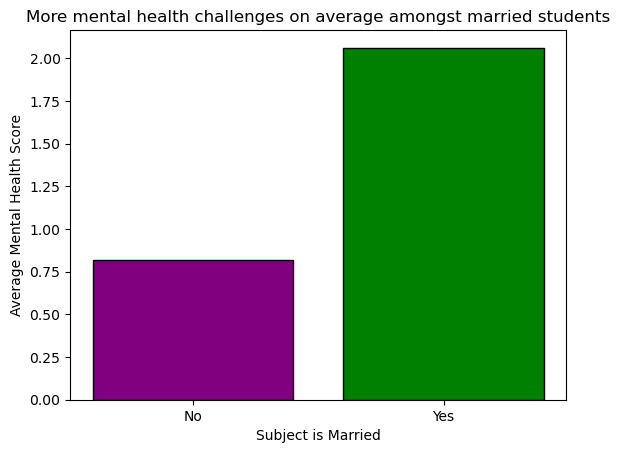

In [25]:
#Group by married and unmarried and calculate average score in each category 
avg_values = df.groupby('married')['mh_score'].mean().reset_index()
bar_colors = ['purple', 'green'] 
border_color = 'black'  
#Plot this relationship
plt.bar(avg_values['married'], avg_values['mh_score'], color=bar_colors, edgecolor=border_color)
plt.xlabel('Subject is Married')
plt.ylabel('Average Mental Health Score')
plt.title('More mental health challenges on average amongst married students')
plt.show()

As we can see, those who are married seem to have a much higher mh_score, which as stated above, indicates higher severity of mental health challenges. This could be for a multitude of reasons - such as the fact that married life could be difficult to balance if you are also an undergraduate university student.

Let's now explore the distribution of average mental health score across major categories 📊

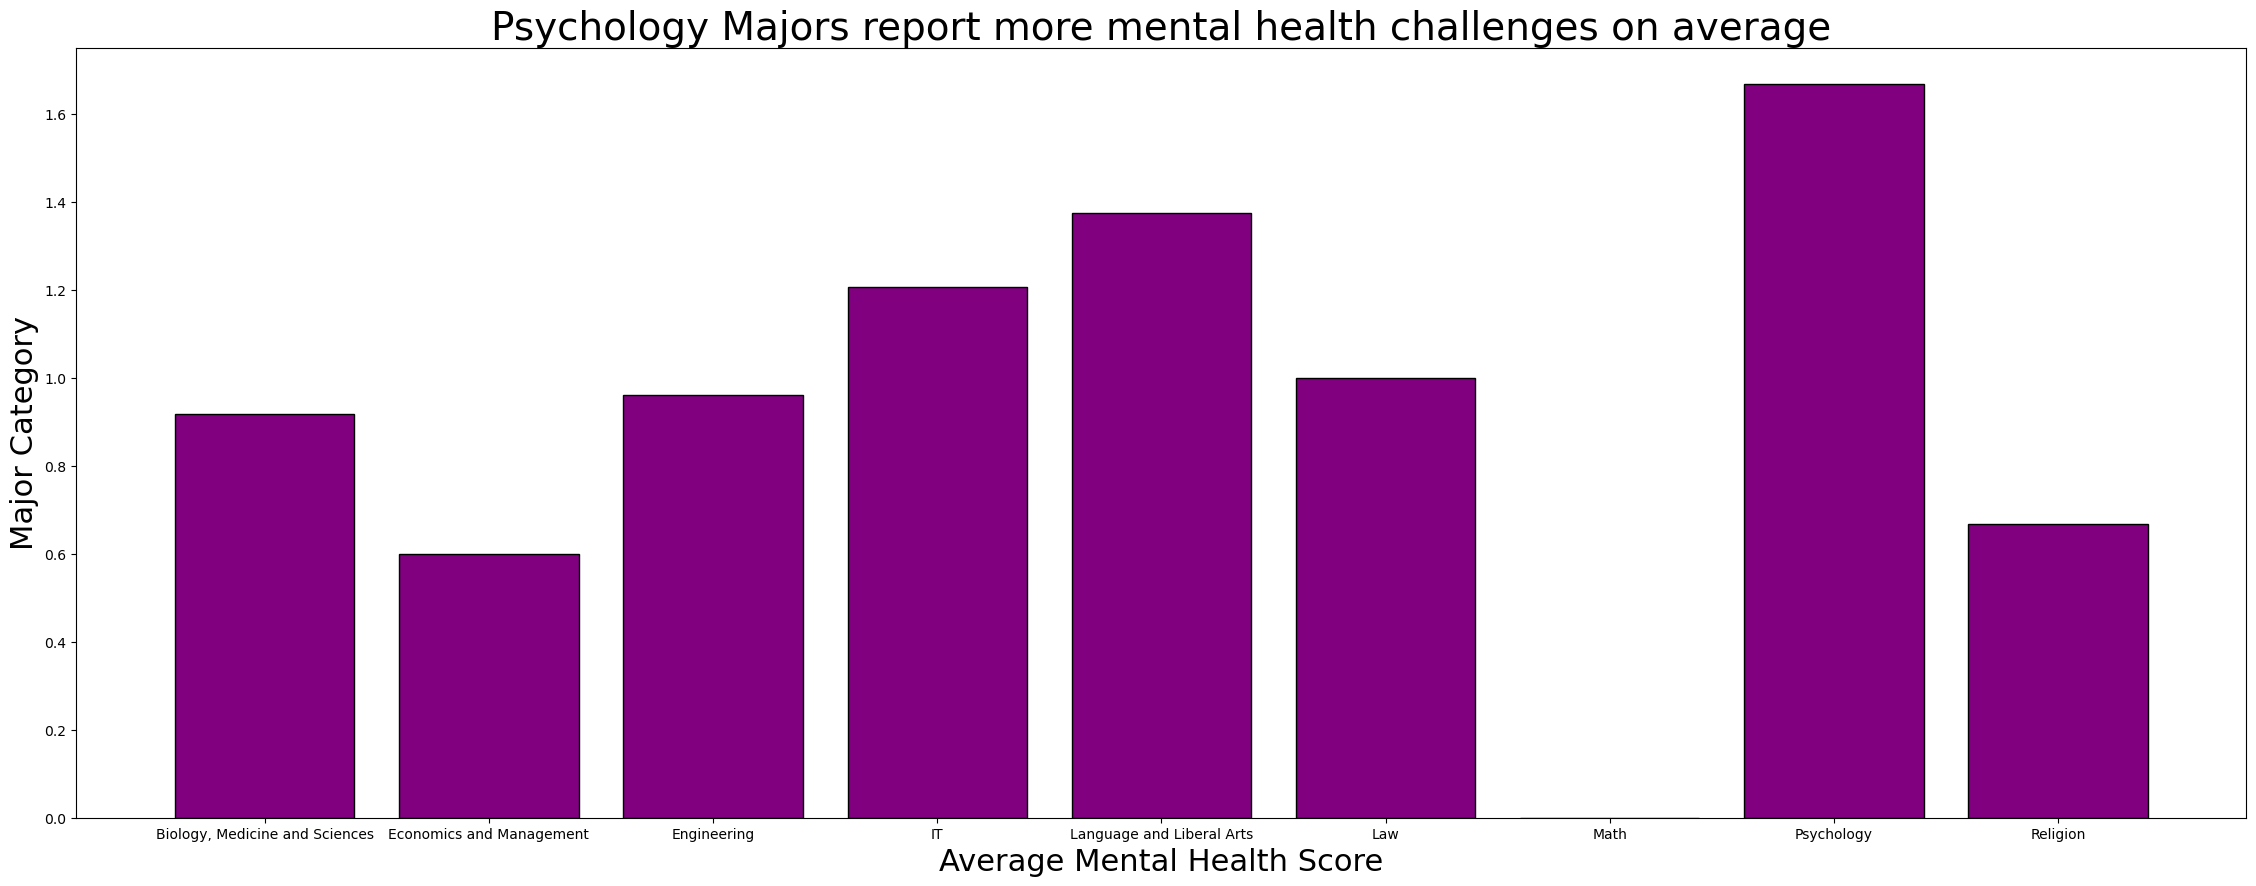

In [26]:
#Group by major category and calculate average score in each category 
avg_major = df.groupby('category')['mh_score'].mean().reset_index()
#Create visualization
border_color = 'black'  
plt.figure(figsize=(28, 10))
plt.xlabel('Average Mental Health Score',fontsize=22)
plt.ylabel('Major Category',fontsize=22)
plt.title('Psychology Majors report more mental health challenges on average',fontsize=28)
plt.bar(avg_major['category'], avg_major['mh_score'],color='purple',edgecolor=border_color)
plt.show()

Now let's run the same analysis with GPA.

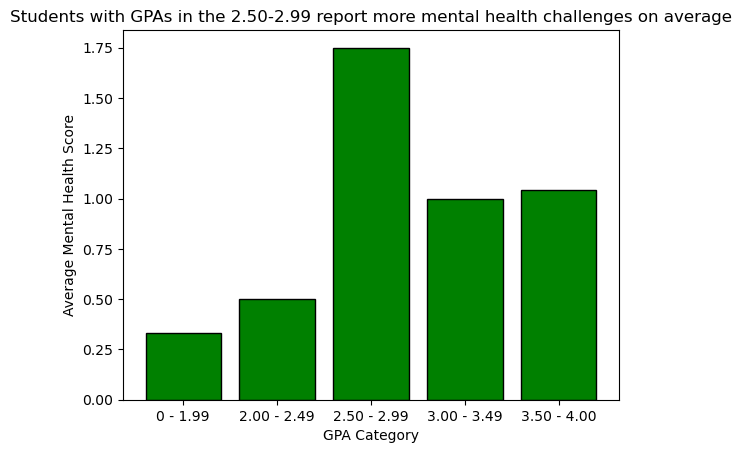

In [27]:
#Group by gpa category and calculate average score in each category 
avg_gpa = df.groupby('gpa')['mh_score'].mean().reset_index()
#Create visualization 
plt.ylabel('Average Mental Health Score')
plt.xlabel('GPA Category')
border_color = 'black'  
plt.title('Students with GPAs in the 2.50-2.99 report more mental health challenges on average')
plt.bar(avg_gpa['gpa'], avg_gpa['mh_score'],color='green',edgecolor=border_color)
plt.show()

Lastly, let's explore whether mental health scores differentiate on average between female and male students.

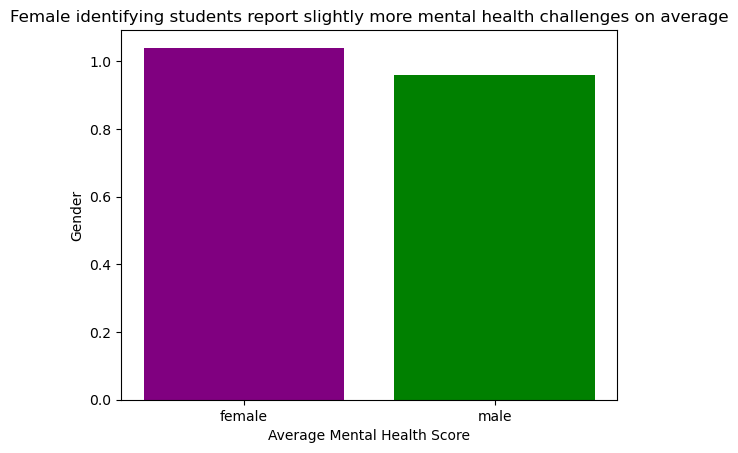

In [28]:
#Group by gender and calculate average score in each category 
gen_df = df.groupby('gender')['mh_score'].mean().reset_index()
plt.bar(gen_df['gender'], gen_df['mh_score'],color=['purple','green'])
plt.xlabel('Average Mental Health Score')
plt.ylabel('Gender')
border_color = 'black'  
plt.title('Female identifying students report slightly more mental health challenges on average')
plt.show()

### Visualization Takaways 🗒
From our visualizations, we notice a few trends in the data set. The groups that report the highest severity of mental health challenges on average tend to be students that are married, psychology majors, people with GPAs between 2.50-2.99, and female-identifying students. While these patterns exist in the data, some may not be accurately reflective of the whole truth. For example, there is stigma around men expressing their mental health challenges, so there may be a chance they are reluctant to reveal their struggles to the full extent. Due to this, the data reflects female-identifying students to have a higher mh_score, but the reality may differ.  

For GPA we can see that students in the middle ranges of the GPA scale report higher mh_scores. This could be associated with burnout, lack of work-life balance and other factors that could result from students who are working hard yet not receiving high grades/desired results. There is an observed decrease in mh_score entering the 3.0-4.0 range because these students may working hard as well, but receiving good grades/positive results that may lead mental health benefits.

## Modeling 📈

Now that we have observed some of the relationships between variables and overall mh_score through visualization, we can now delve into developing models that can accurately predict anxiety, depression, panic, or overall mh_score. This can give us an even clearer idea of how variables in this data set are correlated.

Let's go ahead and create a heatmap to observe correlations between variables.

<AxesSubplot:>

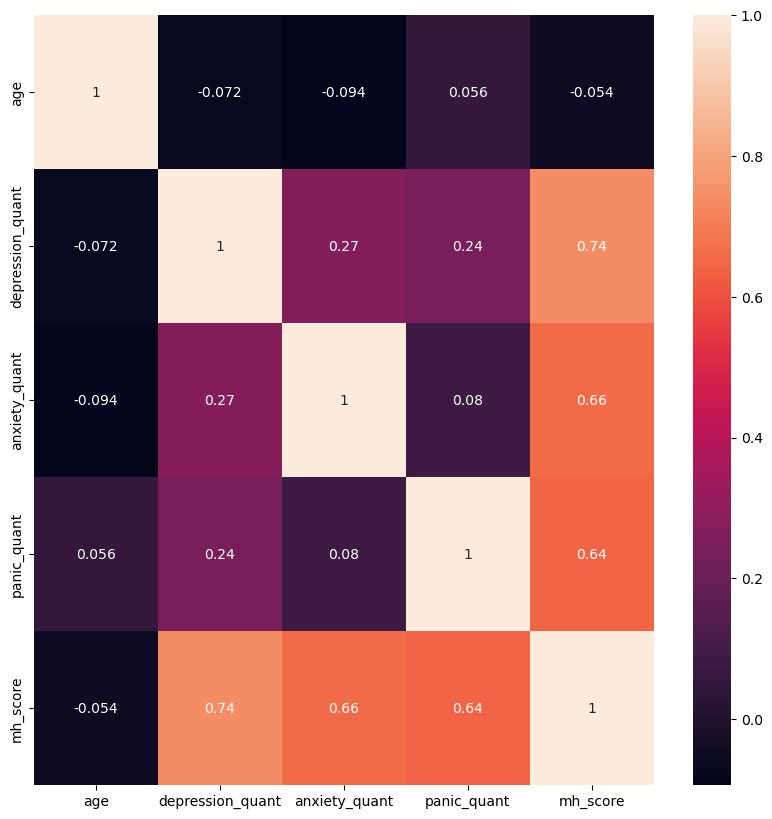

In [14]:
#Creating a heat map to see the correlations between variables
plt.figure(figsize=(10,10))  
sns.heatmap(df.corr(),annot=True, cmap=None)

Above it can be observed that there are a couple of strong correlations. Having depression is highly correlated with overall higher mh_score. Additionally we can see that being married is correlated quite highly with having depression, with a correlation coefficient of 0.59. This is slightly expected, as the visualization observing mh_score in married vs. non-married students showed a much higher mh_score for those who ***are*** married. This graph shows that depression is highly correlated with marital status of the student. 

Now onto model creation! Since this data is mostly composed of categorical variables, I am going to isolate the variables I am interested in using in my model and save it as a new dataframe.

In [15]:
#Creating categorical dataframe
df_cat = df[['gender','major','year','married','treatment','category','gpa']]
df_cat.head()

,gender,major,year,married,treatment,category,gpa
0,female,engineering,year 1,No,No,Engineering,3.00 - 3.49
1,male,islamic_studies,year 2,No,No,Religion,3.00 - 3.49
2,male,information_tech,year 1,No,No,IT,3.00 - 3.49
3,female,law,year 3,Yes,No,Law,3.00 - 3.49
4,male,mathemathics,year 4,No,No,Math,3.00 - 3.49


In the model below, I am going to use a One-hot encoder before I fit my model, as the data is categorical. The one-hot encoder will identify all unique categories in each column and create a new binary column for each unique category. This allows our model to make sense of the variables and unique categories within them, which to then be used by the model to make predictions and find relationships. Without this step, our model is unable to process the content in the variables (🤖: what is 'engineering' and how does it differ from 'law'?).


Since we saw that depression was the most indicative of a higher mh_score (meaning if a student has depression, they are likely to also have either panic and anxiety, therefore leading to a higher mh_score). The correlation coefficient of the correlation between depression and mh_score is 0.74 - this number is positive and close to 1, meaning that there is a strong positive correlation between these variables. If depression is higher, that means mh_score is higher, and if mh_score is higher, that means that those with depression are also reporting other symptoms such as panic and anxiety. This can also indicate depression's comorbidity with other psychiatric disorders and mental health issues, such as anxiety disorders. 

Let us create a model to predict students' depression using the categorical factors defined above.

In [19]:
X = df_cat
y = df['depression'] 

# Defining the One-hot encoder and determinining train-test split
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X)
X_final = pd.DataFrame(X_encoded.toarray(), columns=encoder.get_feature_names(['gpa','gender','major','year','married','treatment','category']))
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)


# Defining our classification model and fitting it
model = RandomForestClassifier()  

# Perform recursive feature elimination to choose the optimal features for highest model accuracy
rfe = RFE(estimator=model, n_features_to_select=1, step=1)
rfe.fit(X_train, y_train)

# Use the selected features based 
selected_features = rfe.support_
X_train_selected = X_train.iloc[:, selected_features]
X_test_selected = X_test.iloc[:, selected_features]

# Train classifier using selected features
model_selected = RandomForestClassifier(n_estimators=100, random_state=42)
model_selected.fit(X_train_selected, y_train)

#Predict using the selected features
predictions_selected = model_selected.predict(X_test_selected)

# Evaluate the model with selected features
accuracy= accuracy_score(y_test, predictions_selected)
print(f"Model Accuracy following feature elimination: {accuracy}")
# avoid future warning messages
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

Model Accuracy following feature elimination: 0.85


After some trial, I found that Random Forest Classifier is the best model for this dataset, and it gives us a very high accuracy score (0.85) - especially after feature selection. Feature selection is important because it eliminates any feature of the dataset that may be bringing the accuracy of the model's overall predictions down. Our model, given a student's gender, major, year, marital status, gpa range, treatment, and major category can predict whether or not they have depression with an 85% accuracy (after feature elimination) 🦾

Let's create a visualization of the accuracy of our model using a confusion matrix 🧮

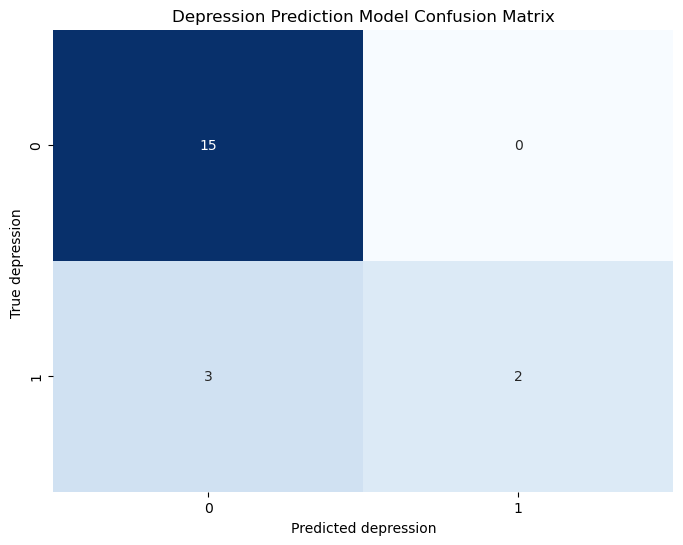

In [18]:
# Compute confusion matrix
cm = confusion_matrix(y_test, predictions_selected)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted depression')
plt.ylabel('True depression ')
plt.title('Depression Prediction Model Confusion Matrix')
plt.show()

The zeros on the axes mean no report of depression, while 1 means report of depression. Our model has a high true negative rate (meaning it very frequently correctly predicts when a student does not have depression), so this model has high ***specificity***.It also has a high true positive rate (meaning it very frequently correctly predicts when a student does not have depression), so this model has high ***sensitivity or recall***.✏️

### Wrapping it up! 🎁

Let's create a final visualization. Below we will visualize our model to visualize the performance of our classifier model with ROC-AUC curve.The ROC-AUC curve allows us to assess a model's ability to distinguish between classes across various thresholds.

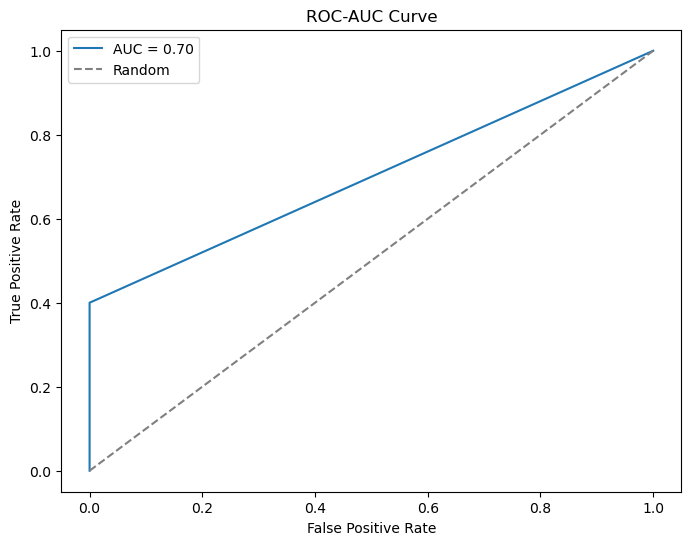

In [24]:
y_true = y_test.map({'No': 0, 'Yes': 1})
predictions_prob = np.where(predictions_selected == 'Yes', 1, 0)
fpr, tpr, thresholds = roc_curve(y_true, predictions_prob)
auc = roc_auc_score(y_true, predictions_prob)

# Plotting ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend()
plt.show()

We have an AUC value of 0.70, which is on the higher end (ranges from 0 to 1, with 1 being a perfect predictor). An AUC value of 0.70 indicates that our model has a very strong ability to discriminate between the two classes, in this case depression (-) and depression (+). 

### Future Extensions
This analysis can be taken further with more modeling and trials, and developing even more features and using those to create new models. Possible feature additions could be binning the age column to create age group categories and using that for analysis, or creating a STEM vs. non-STEM major column to analyze if is correlated with higher rates of students experiencing mental health disorders. Further analysis into anxiety and panic can also be related. It could also be beneficial to run this analysis with a similar dataset, except with students from both universities in countries that are culturally very different or very similar to Malaysia. It may be interesting to then compare the results from these analyses to this original analysis, to see how sociocultural factors may interplay into the rates of depression, panic, and anxiety within undergraduate student populations.

## Conclusion 📒
To summarize, within this data set, high levels of reported mental health struggles exist with psychology majors, married students, female-identifying students, and those with GPAs in the 2.50-2.99 range. A model was succesfully built that can predict depression based on gender, major, year, marital status, treatment received, major category,and gpa at an 85% accuracy rate. 

College is difficult, and mental health is a very real and challenging issue that a multitude of students grapple with. In this data set, we see various reports of depression, anxiety and panic amongst the student body, and higher experiences of these symptoms within certain groups. It is important to study, research and analyze data to target and identify these issues that students face in order to identify factors that may increase likelihood and severity of mental health disorders, and attempt to discover ways to alleviate these challenges. The first step is to address, identify and analyze the issue - once the process begins and awareness is raised, more concrete solutions can follow.

Your time and attention dedicated to my project are greatly appreciated! Thank you for engaging with my exploration and analysis. 👋🏾